In [1]:
!pip install requests==2.22.0 beautifulsoup4==4.8.1

     |████████████████████████████████| 61kB 3.1MB/s 
     |████████████████████████████████| 102kB 4.6MB/s 
     |████████████████████████████████| 61kB 6.7MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.22.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: idna 2.10
    Uninstalling idna-2.10:
      Successfully uninstalled idna-2.10
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [2]:
!pip install requests

In [3]:
import datetime
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns

In [4]:

start_date = datetime.date(2020, 1, 1)
end_date = datetime.date(2020, 12, 31)
delta = datetime.timedelta(days=1)
l = []
while start_date <= end_date:
    # print(start_date.strftime("%b"))
    day = start_date.strftime("%d")
    month = start_date.strftime("%b")
    year =start_date.strftime("%Y")
    start_date += delta
    a = (day+"-"+month+"-"+year)
    url = f'https://agmarknet.gov.in/SearchCmmMkt.aspx?Tx_Commodity=24&Tx_State=UP&Tx_District=1&Tx_Market=0&DateFrom={a}&DateTo={a}&Fr_Date={a}&To_Date={a}&Tx_Trend=0&Tx_CommodityHead=Potato&Tx_StateHead=Uttar+Pradesh&Tx_DistrictHead=Agra&Tx_MarketHead=--Select--'
    response  = requests.get(url).text
    soup = BeautifulSoup(response , 'html.parser')
    table = soup.find("table" , class_ = "tableagmark_new")
    
    for t in table.find_all("tr"):
      m = []
      for a in t.find_all("td"):
        # print(a.text.strip())
        m.append(a.text.strip())
      l.append(m)
    


In [69]:
df = pd.DataFrame(l[1:],columns = ['Sl. no.','District Name', 'Market Name','Commodity','Variety','Grade','Min Price (Rs./Quintal)','Max Price (Rs./Quintal)','Modal Price (Rs./Quintal)','Price Date'])

In [70]:
display(df.head())

,Sl. no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1,Agra,Achnera,Potato,Desi,FAQ,1300,1400,1350,01 Jan 2020
1,2,Agra,Fatehpur Sikri,Potato,Local,FAQ,1400,1520,1455,01 Jan 2020
2,3,Agra,Jagnair,Potato,Desi,FAQ,1250,1350,1300,01 Jan 2020
3,4,Agra,Jarar,Potato,Desi,FAQ,1200,1300,1250,01 Jan 2020
4,5,Agra,Khairagarh,Potato,Desi,FAQ,1200,1300,1250,01 Jan 2020


In [71]:
df = df.dropna(subset = ["District Name"], inplace=False)

In [72]:
df = df.reset_index(drop=True)
display(df.head())

,Sl. no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1,Agra,Achnera,Potato,Desi,FAQ,1300,1400,1350,01 Jan 2020
1,2,Agra,Fatehpur Sikri,Potato,Local,FAQ,1400,1520,1455,01 Jan 2020
2,3,Agra,Jagnair,Potato,Desi,FAQ,1250,1350,1300,01 Jan 2020
3,4,Agra,Jarar,Potato,Desi,FAQ,1200,1300,1250,01 Jan 2020
4,5,Agra,Khairagarh,Potato,Desi,FAQ,1200,1300,1250,01 Jan 2020


In [73]:
df['Market Name'].unique()

array(['Achnera', 'Fatehpur Sikri', 'Jagnair', 'Jarar', 'Khairagarh',
       'Samsabad', 'Agra', 'Fatehabad'], dtype=object)

In [76]:
df['Market Name'].value_counts()

Achnera           306
Fatehpur Sikri    290
Agra              285
Fatehabad         258
Jagnair           187
Khairagarh        187
Samsabad          168
Jarar             146
Name: Market Name, dtype: int64

In [83]:
date = []
month = []
year = []
ddmmyyyy = []
for i in range(1827):
  date.append(df['Price Date'][i][:2])
  a = df['Price Date'][i][:2]
  month_name = df['Price Date'][i][3:6]
  datetime_object = datetime.datetime.strptime(month_name, "%b")
  month.append(datetime_object.month)
  b = datetime_object.month
  year.append(df['Price Date'][i][7:])
  c = df['Price Date'][i][7:]
  ddmmyyyy.append(f'{a}-{b}-{c}')
df['date'] = date
df['month'] = month
df['year'] = year
df['dd/mm/yyyy'] = ddmmyyyy
display(df.head())

,Sl. no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date,date,month,year,dd/mm/yyyy
0,1,Agra,Achnera,Potato,Desi,FAQ,1300,1400,1350,01 Jan 2020,01,1,2020,01-1-2020
1,2,Agra,Fatehpur Sikri,Potato,Local,FAQ,1400,1520,1455,01 Jan 2020,01,1,2020,01-1-2020
2,3,Agra,Jagnair,Potato,Desi,FAQ,1250,1350,1300,01 Jan 2020,01,1,2020,01-1-2020
3,4,Agra,Jarar,Potato,Desi,FAQ,1200,1300,1250,01 Jan 2020,01,1,2020,01-1-2020
4,5,Agra,Khairagarh,Potato,Desi,FAQ,1200,1300,1250,01 Jan 2020,01,1,2020,01-1-2020


In [103]:
# display(df)
df['dd/mm/yyyy'] = pd.to_datetime(df['dd/mm/yyyy'], format='%d-%m-%Y')
display(df.head())

,Sl. no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date,date,month,year,dd/mm/yyyy
0,1,Agra,Achnera,Potato,Desi,FAQ,1300,1400,1350,01 Jan 2020,01,1,2020,2020-01-01
1,2,Agra,Fatehpur Sikri,Potato,Local,FAQ,1400,1520,1455,01 Jan 2020,01,1,2020,2020-01-01
2,3,Agra,Jagnair,Potato,Desi,FAQ,1250,1350,1300,01 Jan 2020,01,1,2020,2020-01-01
3,4,Agra,Jarar,Potato,Desi,FAQ,1200,1300,1250,01 Jan 2020,01,1,2020,2020-01-01
4,5,Agra,Khairagarh,Potato,Desi,FAQ,1200,1300,1250,01 Jan 2020,01,1,2020,2020-01-01


In [125]:
Achnera = df[df['Market Name']=="Achnera"].reset_index()
Fatehpur_Sikri = df[df['Market Name']=="Fatehpur Sikri"].reset_index()
Agra = df[df['Market Name']=="Agra"].reset_index()
Fatehabad = df[df['Market Name']=="Fatehabad"].reset_index()
Khairagarh = df[df['Market Name']=="Khairagarh"].reset_index()
Jagnair = df[df['Market Name']=="Jagnair"].reset_index()
Samsabad = df[df['Market Name']=="Samsabad"].reset_index()
Jarar = df[df['Market Name']=="Jarar"].reset_index()

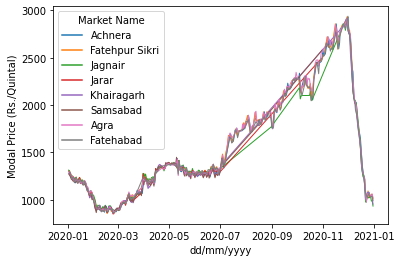

In [131]:
sns.lineplot(x=df['dd/mm/yyyy'], y=df['Modal Price (Rs./Quintal)'].rolling(10).mean(),palette="tab10", linewidth=1,hue =df['Market Name'] )

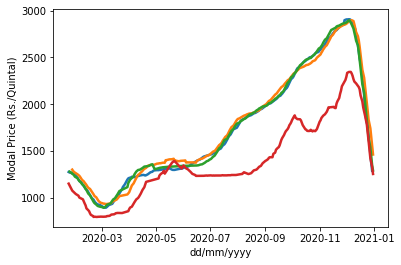

In [126]:
sns.lineplot(x = Achnera['dd/mm/yyyy'], y = Achnera['Modal Price (Rs./Quintal)'].rolling(20).mean(),palette="tab10", linewidth=2.5)
sns.lineplot(x = Fatehpur_Sikri['dd/mm/yyyy'],y= Fatehpur_Sikri['Modal Price (Rs./Quintal)'].rolling(20).mean(),palette="tab10", linewidth=2.5)
sns.lineplot(x= Agra['dd/mm/yyyy'], y=Agra['Modal Price (Rs./Quintal)'].rolling(20).mean(),palette="tab10", linewidth=2.5)
sns.lineplot(x=Fatehabad['dd/mm/yyyy'], y=Fatehabad['Modal Price (Rs./Quintal)'].rolling(20).mean(),palette="tab10", linewidth=2.5)
# sns.lineplot(x=Khairagarh['dd/mm/yyyy'], y=Khairagarh['Modal Price (Rs./Quintal)'].rolling(20).mean(),palette="tab10", linewidth=2.5,hue=af['Market Name'])
# sns.lineplot(x=Jagnair['dd/mm/yyyy'], y=Jagnair['Modal Price (Rs./Quintal)'].rolling(20).mean(),palette="tab10", linewidth=2.5,hue=af['Market Name'])
# sns.lineplot(x=Samsabad['dd/mm/yyyy'], y=Samsabad['Modal Price (Rs./Quintal)'].rolling(20).mean(),palette="tab10", linewidth=2.5,hue=af['Market Name'])
# sns.lineplot(x=Jarar['dd/mm/yyyy'], y=Jarar['Modal Price (Rs./Quintal)'].rolling(20).mean(),palette="tab10", linewidth=2.5,hue=af['Market Name'])